In [1]:
#Import libraries
import pandas as pd
import numpy as np
import pyodbc
import squarify
import seaborn as sns
import pandas_profiling # for EDA
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Connect to the database
cnxn = pyodbc.connect('Driver={SQL Server Native Client 11.0};'
                      'Server=DESKTOP-IAV5LRV;'
                      'Database=Czech_Bank;'
                      'Trusted_Connection=yes;')

In [3]:
#Import all relevant columns from the client table

client = pd.read_sql_query('''

select
client_id,
district_id,
DOB,
Gender

from [dbo].[client]

''',cnxn)


In [4]:
#Check the stats
client.describe()

,client_id,district_id
count,5369.000000,5369.000000
mean,3359.011920,37.310114
std,2832.911984,25.043690
min,1.000000,1.000000
25%,1418.000000,14.000000
50%,2839.000000,38.000000
75%,4257.000000,60.000000
max,13998.000000,77.000000


In [5]:
#View the data from the client table
client.head()

,client_id,district_id,DOB,Gender
0,1,18,1970-12-13,F
1,2,1,1945-02-04,M
2,3,1,1940-10-09,F
3,4,5,1956-12-01,M
4,5,5,1960-07-03,F


In [6]:
#get the customers age from their DOB
# import the required library
from datetime import date


In [7]:
client.DOB = pd.to_datetime(client['DOB'], errors= 'coerce')

In [8]:
#get the time for now
now = pd.to_datetime('now')
now

Timestamp('2020-12-12 16:14:03.644321')

In [9]:
#Subtracting to get the age
age = (now-client.DOB).astype('<m8[Y]')
age

0       50.0
1       75.0
2       80.0
3       64.0
4       60.0
        ... 
5364    75.0
5365    77.0
5366    52.0
5367    58.0
5368    67.0
Name: DOB, Length: 5369, dtype: float64

In [10]:
#Option 2
age = (now.year - client['DOB'].dt.year) - ((now.month -client['DOB'].dt.month) <0)
age

0       50
1       75
2       80
3       64
4       60
        ..
5364    75
5365    77
5366    52
5367    58
5368    67
Name: DOB, Length: 5369, dtype: int64

In [11]:
#adding the age to the client data
client['Age'] = age

In [12]:
#Get a feel of the dataset
client.describe()

,client_id,district_id,Age
count,5369.000000,5369.000000,5369.000000
mean,3359.011920,37.310114,66.801639
std,2832.911984,25.043690,17.282283
min,1.000000,1.000000,33.000000
25%,1418.000000,14.000000,52.000000
50%,2839.000000,38.000000,66.000000
75%,4257.000000,60.000000,80.000000
max,13998.000000,77.000000,109.000000


In [13]:
#viewing the dataset
client.head(5)

,client_id,district_id,DOB,Gender,Age
0,1,18,1970-12-13,F,50
1,2,1,1945-02-04,M,75
2,3,1,1940-10-09,F,80
3,4,5,1956-12-01,M,64
4,5,5,1960-07-03,F,60


In [14]:
#import the district table containing the demography for each client

district = pd.read_sql_query('''
select
[District Code],
[District Name],
Region,
Population,
[Ratio of Urban Inhabitants],
[Average Salary],
[Unemployment Rate 95],
[Number of Committeed Crimes 95],
[Unemployment Rate 96],
[Number of Committed Crimes 96]

from [dbo].[District]

''',cnxn)


In [15]:
#Merge the district and the client table

client_data = pd.merge(client,district, left_on='district_id', right_on='District Code', how = 'left')

In [16]:
client_data.head()

,client_id,district_id,DOB,Gender,Age,District Code,District Name,Region,Population,Ratio of Urban Inhabitants,Average Salary,Unemployment Rate 95,Number of Committeed Crimes 95,Unemployment Rate 96,Number of Committed Crimes 96
0,1,18,1970-12-13,F,50,18,Pisek,south Bohemia,70699,65.3,8968.0,3.0,1740.0,3,1910
1,2,1,1945-02-04,M,75,1,Hl.m. Praha,Prague,1204953,100.0,12541.0,0.0,85677.0,0,99107
2,3,1,1940-10-09,F,80,1,Hl.m. Praha,Prague,1204953,100.0,12541.0,0.0,85677.0,0,99107
3,4,5,1956-12-01,M,64,5,Kolin,central Bohemia,95616,51.4,9307.0,4.0,2616.0,4,3040
4,5,5,1960-07-03,F,60,5,Kolin,central Bohemia,95616,51.4,9307.0,4.0,2616.0,4,3040


In [17]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5369 entries, 0 to 5368
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   client_id                       5369 non-null   int64         
 1   district_id                     5369 non-null   int64         
 2   DOB                             5369 non-null   datetime64[ns]
 3   Gender                          5369 non-null   object        
 4   Age                             5369 non-null   int64         
 5   District Code                   5369 non-null   int64         
 6   District Name                   5369 non-null   object        
 7   Region                          5369 non-null   object        
 8   Population                      5369 non-null   int64         
 9   Ratio of Urban Inhabitants      5369 non-null   float64       
 10  Average Salary                  5369 non-null   float64       
 11  Unem

In [18]:
#Importing the disp table
disp = pd.read_sql_query('''
select
disp_id,
client_id,
account_id,
type

from [dbo].[disp]

''',cnxn)

In [19]:
#merging with client data
disp_data = pd.merge(client_data, disp, how= 'left')

In [20]:
# Review the data
disp_data.describe()

,client_id,district_id,Age,District Code,Population,Ratio of Urban Inhabitants,Average Salary,Unemployment Rate 95,Number of Committeed Crimes 95,Unemployment Rate 96,Number of Committed Crimes 96,disp_id,account_id
count,5369.000000,5369.000000,5369.000000,5369.000000,5.369000e+03,5369.000000,5369.000000,5308.000000,5308.000000,5369.000000,5369.000000,5369.000000,5369.000000
mean,3359.011920,37.310114,66.801639,37.310114,2.692806e+05,69.240045,9510.758614,2.894499,14818.629616,3.422611,16352.240082,3337.097970,2767.496927
std,2832.911984,25.043690,17.282283,25.043690,3.590500e+05,19.896870,1330.686689,1.922118,27094.330501,2.245964,31330.146616,2770.418826,2307.843630
min,1.000000,1.000000,33.000000,1.000000,4.282100e+04,33.900000,8110.000000,0.000000,818.000000,0.000000,888.000000,1.000000,1.000000
25%,1418.000000,14.000000,52.000000,14.000000,8.888400e+04,52.700000,8547.000000,2.000000,2166.000000,2.000000,2252.000000,1418.000000,1178.000000
50%,2839.000000,38.000000,66.000000,38.000000,1.219470e+05,63.100000,8980.000000,3.000000,3729.000000,3.000000,3839.000000,2839.000000,2349.000000
75%,4257.000000,60.000000,80.000000,60.000000,2.261220e+05,85.600000,9897.000000,4.000000,6949.000000,5.000000,6295.000000,4257.000000,3526.000000
max,13998.000000,77.000000,109.000000,77.000000,1.204953e+06,100.000000,12541.000000,7.000000,85677.000000,9.000000,99107.000000,13690.000000,11382.000000


In [21]:
#View the dataset
disp_data.head(3)

,client_id,district_id,DOB,Gender,Age,District Code,District Name,Region,Population,Ratio of Urban Inhabitants,Average Salary,Unemployment Rate 95,Number of Committeed Crimes 95,Unemployment Rate 96,Number of Committed Crimes 96,disp_id,account_id,type
0,1,18,1970-12-13,F,50,18,Pisek,south Bohemia,70699,65.3,8968.0,3.0,1740.0,3,1910,1,1,OWNER
1,2,1,1945-02-04,M,75,1,Hl.m. Praha,Prague,1204953,100.0,12541.0,0.0,85677.0,0,99107,2,2,OWNER
2,3,1,1940-10-09,F,80,1,Hl.m. Praha,Prague,1204953,100.0,12541.0,0.0,85677.0,0,99107,3,2,USER


In [22]:
#Import the account table

accounts = pd.read_sql_query(
'''
select
account_id,
district_id,
Freq_in_English as 'Frequency of Statement Issuance',
Date as 'Date account opened'

from [dbo].[account]

''', cnxn)

In [23]:
#view the account table
accounts.head(5)

,account_id,district_id,Frequency of Statement Issuance,Date account opened
0,1,18,Monthly Issuance,1995-03-24
1,2,1,Monthly Issuance,1993-02-26
2,3,5,Monthly Issuance,1997-07-07
3,4,12,Monthly Issuance,1996-02-21
4,5,15,Monthly Issuance,1997-05-30


In [24]:
#check empty values in the dataset
accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   account_id                       4500 non-null   int64         
 1   district_id                      4500 non-null   int64         
 2   Frequency of Statement Issuance  4500 non-null   object        
 3   Date account opened              4500 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 140.8+ KB


In [25]:
#Join accounts and disp datasets

accounts_data = pd.merge(disp_data, accounts, how= 'left')

In [26]:
#view the resulting dataset
accounts_data.describe()

,client_id,district_id,Age,District Code,Population,Ratio of Urban Inhabitants,Average Salary,Unemployment Rate 95,Number of Committeed Crimes 95,Unemployment Rate 96,Number of Committed Crimes 96,disp_id,account_id
count,5369.000000,5369.000000,5369.000000,5369.000000,5.369000e+03,5369.000000,5369.000000,5308.000000,5308.000000,5369.000000,5369.000000,5369.000000,5369.000000
mean,3359.011920,37.310114,66.801639,37.310114,2.692806e+05,69.240045,9510.758614,2.894499,14818.629616,3.422611,16352.240082,3337.097970,2767.496927
std,2832.911984,25.043690,17.282283,25.043690,3.590500e+05,19.896870,1330.686689,1.922118,27094.330501,2.245964,31330.146616,2770.418826,2307.843630
min,1.000000,1.000000,33.000000,1.000000,4.282100e+04,33.900000,8110.000000,0.000000,818.000000,0.000000,888.000000,1.000000,1.000000
25%,1418.000000,14.000000,52.000000,14.000000,8.888400e+04,52.700000,8547.000000,2.000000,2166.000000,2.000000,2252.000000,1418.000000,1178.000000
50%,2839.000000,38.000000,66.000000,38.000000,1.219470e+05,63.100000,8980.000000,3.000000,3729.000000,3.000000,3839.000000,2839.000000,2349.000000
75%,4257.000000,60.000000,80.000000,60.000000,2.261220e+05,85.600000,9897.000000,4.000000,6949.000000,5.000000,6295.000000,4257.000000,3526.000000
max,13998.000000,77.000000,109.000000,77.000000,1.204953e+06,100.000000,12541.000000,7.000000,85677.000000,9.000000,99107.000000,13690.000000,11382.000000


In [27]:
#Check all the columns in the dataset
accounts_data.columns

Index(['client_id', 'district_id', 'DOB', 'Gender', 'Age', 'District Code',
       'District Name', 'Region', 'Population', 'Ratio of Urban Inhabitants',
       'Average Salary', 'Unemployment Rate 95',
       'Number of Committeed Crimes 95', 'Unemployment Rate 96',
       'Number of Committed Crimes 96', 'disp_id', 'account_id', 'type',
       'Frequency of Statement Issuance', 'Date account opened'],
      dtype='object')

In [28]:
#Check datatypes and null values in the dataset
accounts_data.isnull().sum()

client_id                            0
district_id                          0
DOB                                  0
Gender                               0
Age                                  0
District Code                        0
District Name                        0
Region                               0
Population                           0
Ratio of Urban Inhabitants           0
Average Salary                       0
Unemployment Rate 95                61
Number of Committeed Crimes 95      61
Unemployment Rate 96                 0
Number of Committed Crimes 96        0
disp_id                              0
account_id                           0
type                                 0
Frequency of Statement Issuance    494
Date account opened                494
dtype: int64

In [29]:
#Import transactions for the dataset

trans = pd.read_sql('''
select
trans_id,
account_id,
date as 'Transaction Date',
case
	when type ='PRIJEM' then 'Credit'
	Else 'Debit'
End as Transaction_Type,

case
	when operation = 'VYBER KARTOU' then 'Credit Card Withdrawal'
	when operation = 'VKLAD' then 'Credit in Cash'
	when operation = 'prevod z uctu' then 'Collection from Another Bank'
	when operation = 'vyber' then 'Withdrawal in Cash'
	else 'Remittance to another Bank'
end as 'Type of Transaction'
, amount,

balance as 'Account Balance',

case
	when k_symbol = 'POJISTNE' then 'Insurance Payment'
	when k_symbol = 'sluzby' then 'Payment for Statement'
	when k_symbol = 'Urok' then 'Interest Credited'
	when k_symbol = 'SANKC UROK' Then 'Sanction Interest if Negative Balance'
	when k_symbol = 'Sipo' then 'Household'
	when k_symbol = 'Duchod' then 'old-age' 
	else 'Remittance to another Bank'
end as 'Characterization of Transaction'
,bank as 'Bank of Partner',
account as 'Partner Account'

from [dbo].[trans]
''', cnxn)

In [30]:
# view the trans dataset

trans.head()

,trans_id,account_id,Transaction Date,Transaction_Type,Type of Transaction,amount,Account Balance,Characterization of Transaction,Bank of Partner,Partner Account
0,1,1,950324,Credit,Credit in Cash,1000.0,1000.0,Remittance to another Bank,None,None
1,5,1,950413,Credit,Collection from Another Bank,3679.0,4679.0,Remittance to another Bank,AB,41403269
2,6,1,950513,Credit,Collection from Another Bank,3679.0,20977.2,Remittance to another Bank,AB,41403269
3,7,1,950613,Credit,Collection from Another Bank,3679.0,26835.2,Remittance to another Bank,AB,41403269
4,8,1,950713,Credit,Collection from Another Bank,3679.0,30414.8,Remittance to another Bank,AB,41403269


In [31]:
#Checking out the number of transactions in the dataset
trans.describe()

,trans_id,account_id,Transaction Date,amount,Account Balance
count,1.056320e+06,1.056320e+06,1.056320e+06,1.056320e+06,1.056320e+06
mean,1.335311e+06,2.936867e+03,9.656748e+05,5.924146e+03,3.851833e+04
std,1.227487e+06,2.477345e+03,1.394535e+04,9.522735e+03,2.211787e+04
min,1.000000e+00,1.000000e+00,9.301010e+05,0.000000e+00,-4.112570e+04
25%,4.302628e+05,1.204000e+03,9.601160e+05,1.359000e+02,2.240250e+04
50%,8.585065e+05,2.434000e+03,9.704100e+05,2.100000e+03,3.314340e+04
75%,2.060979e+06,3.660000e+03,9.802280e+05,6.800000e+03,4.960362e+04
max,3.682987e+06,1.138200e+04,9.812310e+05,8.740000e+04,2.096370e+05


In [32]:
# Joining the trans data to the accounts_data dataset
trans_data = pd.merge(accounts_data, trans, how = 'left')

In [33]:
#get a feel of the resulting dataset
trans_data.describe()

,client_id,district_id,Age,District Code,Population,Ratio of Urban Inhabitants,Average Salary,Unemployment Rate 95,Number of Committeed Crimes 95,Unemployment Rate 96,Number of Committed Crimes 96,disp_id,account_id,trans_id,Transaction Date,amount,Account Balance
count,1.262625e+06,1.262625e+06,1.262625e+06,1.262625e+06,1.262625e+06,1.262625e+06,1.262625e+06,1.249710e+06,1.249710e+06,1.262625e+06,1.262625e+06,1.262625e+06,1.262625e+06,1.262625e+06,1.262625e+06,1.262625e+06,1.262625e+06
mean,3.556496e+03,3.746681e+01,6.611505e+01,3.746681e+01,2.701233e+05,6.926534e+01,9.521933e+03,2.913327e+00,1.487443e+04,3.433616e+00,1.642587e+04,3.528402e+03,2.927288e+03,1.332701e+06,9.656211e+05,5.873195e+03,3.842065e+04
std,3.045982e+03,2.513161e+01,1.685067e+01,2.513161e+01,3.593083e+05,1.997936e+01,1.330143e+03,1.928124e+00,2.710469e+04,2.252882e+00,3.135546e+04,2.973958e+03,2.478426e+03,1.228685e+06,1.398746e+04,9.470080e+03,2.210205e+04
min,1.000000e+00,1.000000e+00,3.300000e+01,1.000000e+00,4.282100e+04,3.390000e+01,8.110000e+03,0.000000e+00,8.180000e+02,0.000000e+00,8.880000e+02,1.000000e+00,1.000000e+00,1.000000e+00,9.301010e+05,0.000000e+00,-4.112570e+04
25%,1.450000e+03,1.400000e+01,5.200000e+01,1.400000e+01,8.888400e+04,5.270000e+01,8.547000e+03,2.000000e+00,2.166000e+03,2.000000e+00,2.305000e+03,1.450000e+03,1.201000e+03,4.263580e+05,9.601130e+05,1.349000e+02,2.225640e+04
50%,2.933000e+03,3.900000e+01,6.500000e+01,3.900000e+01,1.226030e+05,6.310000e+01,8.980000e+03,3.000000e+00,3.736000e+03,3.000000e+00,3.839000e+03,2.933000e+03,2.428000e+03,8.550880e+05,9.704090e+05,2.100000e+03,3.296050e+04
75%,4.398000e+03,6.000000e+01,7.800000e+01,6.000000e+01,2.261220e+05,8.560000e+01,9.920000e+03,4.000000e+00,6.949000e+03,5.000000e+00,6.872000e+03,4.398000e+03,3.647000e+03,2.106623e+06,9.802280e+05,6.694000e+03,4.943620e+04
max,1.399800e+04,7.700000e+01,1.090000e+02,7.700000e+01,1.204953e+06,1.000000e+02,1.254100e+04,7.000000e+00,8.567700e+04,9.000000e+00,9.910700e+04,1.369000e+04,1.138200e+04,3.682987e+06,9.812310e+05,8.740000e+04,2.096370e+05


In [34]:
#Look at the data types and null-values of the new dataset
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1262625 entries, 0 to 1262624
Data columns (total 29 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   client_id                        1262625 non-null  int64         
 1   district_id                      1262625 non-null  int64         
 2   DOB                              1262625 non-null  datetime64[ns]
 3   Gender                           1262625 non-null  object        
 4   Age                              1262625 non-null  int64         
 5   District Code                    1262625 non-null  int64         
 6   District Name                    1262625 non-null  object        
 7   Region                           1262625 non-null  object        
 8   Population                       1262625 non-null  int64         
 9   Ratio of Urban Inhabitants       1262625 non-null  float64       
 10  Average Salary                

In [35]:
#Get the unique values of the dataset
trans_data.nunique()

client_id                             5369
district_id                             77
DOB                                   4738
Gender                                   2
Age                                     77
District Code                           77
District Name                           77
Region                                   8
Population                              77
Ratio of Urban Inhabitants              70
Average Salary                          76
Unemployment Rate 95                     8
Number of Committeed Crimes 95          75
Unemployment Rate 96                    10
Number of Committed Crimes 96           76
disp_id                               5369
account_id                            4500
type                                     2
Frequency of Statement Issuance          3
Date account opened                   1510
trans_id                           1056320
Transaction Date                      2191
Transaction_Type                         2
Type of Tra

We need to import the loan and order tables to confirm those that are already indebted.

Their ability to repair is important in granting the credit card.

In [36]:
#Importing the loan table

loan = pd.read_sql_query('''
select
loan_id,
account_id,
date as 'Date loan taken',
amount as 'Amount of Loan',
payments as 'Loan Payments',
duration as 'Loan Duration',
[Expanded Status] as 'Loan Status'

from [dbo].[loan]

''', cnxn)

In [37]:
#Display the data
loan.head()

,loan_id,account_id,Date loan taken,Amount of Loan,Loan Payments,Loan Duration,Loan Status
0,5314,1787,05-07-93,96396.0,8033.0,12,"""Contract Finished, Loan not Paid"""
1,5316,1801,11-07-93,165960.0,4610.0,36,Contract Finished No Problems
2,6863,9188,28-07-93,127080.0,2118.0,60,Contract Finished No Problems
3,5325,1843,03-08-93,105804.0,2939.0,36,Contract Finished No Problems
4,7240,11013,06-09-93,274740.0,4579.0,60,Contract Finished No Problems


Join the loan to the accounts table to know how many accounts are on loan

In [38]:
loan_account = pd.merge(accounts,loan,how='left')

In [39]:
#Check out the count of the status of the various loans in the Bank
loan_account['Loan Status'].value_counts()

"Running Contract, OK so far"         403
Contract Finished No Problems         203
Running Contract Client in Debt        45
"Contract Finished, Loan not Paid"     31
Name: Loan Status, dtype: int64

In [40]:
#import accounts with debit orders

orders = pd.read_sql_query('''
select
order_id,
account_id,
Debbited_Amount as 'Amount Debited',
bank_to as 'Recipient Bank',
Meaning_of_K 'Reason for debit'

from[dbo].[Order]

''', cnxn)

In [41]:
# View the data set
orders.describe()

,order_id,account_id,Amount Debited
count,6471.000000,6471.000000,6471.000000
mean,33778.197497,2962.302890,3280.635698
std,3737.681949,2518.503228,2714.475335
min,29401.000000,1.000000,1.000000
25%,31187.500000,1223.000000,1241.500000
50%,32988.000000,2433.000000,2596.000000
75%,34785.500000,3645.500000,4613.500000
max,46338.000000,11362.000000,14882.000000


In [42]:
#View the dataset
orders.head()

,order_id,account_id,Amount Debited,Recipient Bank,Reason for debit
0,29401,1,2452.0,YZ,Household Payment
1,29402,2,3372.7,ST,Loan Payment
2,29403,2,7266.0,QR,Household Payment
3,29404,3,1135.0,WX,Household Payment
4,29405,3,327.0,CD,FALSE


In [43]:
# Check the count of different customers and their reasons for debit
orders['Reason for debit'].value_counts()

Household Payment     3502
FALSE                 1379
Loan Payment           717
Insurance Payments     532
Leasing                341
Name: Reason for debit, dtype: int64

In [44]:
#merge the Orders and account tables to see accounts that have standing instructions

order_account = pd.merge(accounts, orders, how = 'left')

In [45]:
#Review the dataset
order_account.head()

,account_id,district_id,Frequency of Statement Issuance,Date account opened,order_id,Amount Debited,Recipient Bank,Reason for debit
0,1,18,Monthly Issuance,1995-03-24,29401.0,2452.0,YZ,Household Payment
1,2,1,Monthly Issuance,1993-02-26,29402.0,3372.7,ST,Loan Payment
2,2,1,Monthly Issuance,1993-02-26,29403.0,7266.0,QR,Household Payment
3,3,5,Monthly Issuance,1997-07-07,29404.0,1135.0,WX,Household Payment
4,3,5,Monthly Issuance,1997-07-07,29405.0,327.0,CD,FALSE


In [46]:
#Check out the count for statement issuance
order_account['Frequency of Statement Issuance'].value_counts()

Monthly Issuance              6621
Weekly Issuance                430
Issuance after Transaction     162
Name: Frequency of Statement Issuance, dtype: int64

In [47]:
#Check out the reason for debit
order_account['Reason for debit'].value_counts()

Household Payment     3502
FALSE                 1379
Loan Payment           717
Insurance Payments     532
Leasing                341
Name: Reason for debit, dtype: int64

In [48]:
#View data of those with 'False' Reason for debit
order_account[order_account['Reason for debit']=='FALSE']

,account_id,district_id,Frequency of Statement Issuance,Date account opened,order_id,Amount Debited,Recipient Bank,Reason for debit
4,3,5,Monthly Issuance,1997-07-07,29405.0,327.0,CD,FALSE
12,8,57,Monthly Issuance,1995-09-21,29413.0,6712.0,IJ,FALSE
31,24,74,Monthly Issuance,1996-12-05,29430.0,7641.0,QR,FALSE
34,25,68,Monthly Issuance,1996-07-28,29433.0,1110.0,AB,FALSE
39,29,7,Monthly Issuance,1994-11-24,29440.0,829.0,MN,FALSE
...,...,...,...,...,...,...,...,...
7190,11271,5,Monthly Issuance,1995-09-20,46195.0,2364.0,AB,FALSE
7195,11317,50,Monthly Issuance,1997-07-11,46260.0,2784.0,YZ,FALSE
7206,11359,61,Monthly Issuance,1994-10-01,46330.0,254.0,AB,FALSE
7208,11362,67,Monthly Issuance,1995-10-14,46335.0,56.0,MN,FALSE


In [49]:
#check the empty rows

order_account.isnull().sum()

account_id                           0
district_id                          0
Frequency of Statement Issuance      0
Date account opened                  0
order_id                           742
Amount Debited                     742
Recipient Bank                     742
Reason for debit                   742
dtype: int64

In [50]:
#Merge the loan table to the trans_dataset to continue building our dataset

loans_data = pd.merge(trans_data, loan, on='account_id', how = 'inner')

In [51]:
#Viewing the new dataset
loans_data.head()

,client_id,district_id,DOB,Gender,Age,District Code,District Name,Region,Population,Ratio of Urban Inhabitants,...,Account Balance,Characterization of Transaction,Bank of Partner,Partner Account,loan_id,Date loan taken,Amount of Loan,Loan Payments,Loan Duration,Loan Status
0,2,1,1945-02-04,M,75,1,Hl.m. Praha,Prague,1204953,100.0,...,1100.0,Remittance to another Bank,None,None,4959,05-01-94,80952.0,3373.0,24,Contract Finished No Problems
1,2,1,1945-02-04,M,75,1,Hl.m. Praha,Prague,1204953,100.0,...,21336.0,Remittance to another Bank,ST,66487163,4959,05-01-94,80952.0,3373.0,24,Contract Finished No Problems
2,2,1,1945-02-04,M,75,1,Hl.m. Praha,Prague,1204953,100.0,...,45285.5,Remittance to another Bank,ST,66487163,4959,05-01-94,80952.0,3373.0,24,Contract Finished No Problems
3,2,1,1945-02-04,M,75,1,Hl.m. Praha,Prague,1204953,100.0,...,54630.9,Remittance to another Bank,ST,66487163,4959,05-01-94,80952.0,3373.0,24,Contract Finished No Problems
4,2,1,1945-02-04,M,75,1,Hl.m. Praha,Prague,1204953,100.0,...,67529.6,Remittance to another Bank,ST,66487163,4959,05-01-94,80952.0,3373.0,24,Contract Finished No Problems


In [52]:
# Join the loans data to the orders dataset to get a resulting enlarged data
orders_data = pd.merge(loans_data, orders, how='left', on = 'account_id')

In [53]:
#viewing the expanded dataset
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552017 entries, 0 to 552016
Data columns (total 39 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   client_id                        552017 non-null  int64         
 1   district_id                      552017 non-null  int64         
 2   DOB                              552017 non-null  datetime64[ns]
 3   Gender                           552017 non-null  object        
 4   Age                              552017 non-null  int64         
 5   District Code                    552017 non-null  int64         
 6   District Name                    552017 non-null  object        
 7   Region                           552017 non-null  object        
 8   Population                       552017 non-null  int64         
 9   Ratio of Urban Inhabitants       552017 non-null  float64       
 10  Average Salary                   552017 non-

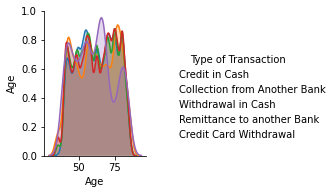

In [54]:
#Plotting a pairplot of this dataset
y = orders_data[['Gender', 'Age', 'type', 'Frequency of Statement Issuance', 'Transaction_Type', 'Type of Transaction', 'Loan Status']]
    
sns.pairplot(y, hue='Type of Transaction')

In [55]:
#Importing the card table
card = pd.read_sql_query('''

Select
card_id,
disp_id,
Date_Issued as 'Date Card Issued',
type 'Type of Card'

from [dbo].[Card]
''', cnxn)


In [56]:
#viewing the imported dataset
card

,card_id,disp_id,Date Card Issued,Type of Card
0,1,9,1998-10-16,gold
1,2,19,1998-03-13,classic
2,3,41,1995-09-03,gold
3,4,42,1998-11-26,classic
4,5,51,1995-04-24,junior
...,...,...,...,...
887,1230,13312,1998-03-08,classic
888,1233,13382,1996-07-06,classic
889,1234,13386,1997-11-28,classic
890,1239,13442,1998-02-02,junior


In [57]:
# Viewing the unique entries in the dataset
card.nunique()

card_id             892
disp_id             892
Date Card Issued    607
Type of Card          3
dtype: int64

In [58]:
#Checking the number of cards in the dataset
card['Type of Card'].value_counts()

classic    659
junior     145
gold        88
Name: Type of Card, dtype: int64

In [59]:
#Counting the cards available
card['Type of Card'].count()

892

In [60]:
#Add the card dataset to the order_data

exp_data = pd.merge(orders_data, card, on='disp_id', how= 'left')

In [61]:
#view the dataset
exp_data.sample(5)

,client_id,district_id,DOB,Gender,Age,District Code,District Name,Region,Population,Ratio of Urban Inhabitants,...,Loan Payments,Loan Duration,Loan Status,order_id,Amount Debited,Recipient Bank,Reason for debit,card_id,Date Card Issued,Type of Card
295420,8105,72,1963-03-12,M,57,72,Olomouc,north Moravia,226122,62.6,...,2298.0,60,Running Contract Client in Debt,39352,2298.2,GH,Loan Payment,NaN,NaT,NaN
1021,3,1,1940-10-09,F,80,1,Hl.m. Praha,Prague,1204953,100.0,...,3373.0,24,Contract Finished No Problems,29403,7266.0,QR,Household Payment,NaN,NaT,NaN
430261,11195,58,1953-12-05,M,67,58,Jihlava,south Moravia,109164,63.6,...,3155.0,60,"""Running Contract, OK so far""",42874,1311.0,AB,Household Payment,1087.0,1996-10-06,classic
389355,10288,48,1959-06-07,M,61,48,Rychnov nad Kneznou,east Bohemia,78955,59.0,...,319.0,24,Contract Finished No Problems,41760,3708.0,EF,Household Payment,NaN,NaT,NaN
243696,6499,44,1963-02-01,M,57,44,Chrudim,east Bohemia,105606,53.0,...,2489.0,60,"""Running Contract, OK so far""",37362,8754.0,YZ,Household Payment,NaN,NaT,NaN


In [62]:
#Generating a view for the classic cards
exp_data.groupby('Type of Card')['Account Balance'].agg(['count','min','max','mean'])

,count,min,max,mean
Type of Card,,,,
classic,78787,-2485.5,189714.3,51988.223946
gold,8259,-2804.8,209637.0,61314.641446
junior,17858,-6830.6,164909.5,55221.360382


In [63]:
#Check the entire dataset for empty values

exp_data.isnull().sum()

client_id                               0
district_id                             0
DOB                                     0
Gender                                  0
Age                                     0
District Code                           0
District Name                           0
Region                                  0
Population                              0
Ratio of Urban Inhabitants              0
Average Salary                          0
Unemployment Rate 95                 2073
Number of Committeed Crimes 95       2073
Unemployment Rate 96                    0
Number of Committed Crimes 96           0
disp_id                                 0
account_id                              0
type                                    0
Frequency of Statement Issuance     77393
Date account opened                 77393
trans_id                                0
Transaction Date                        0
Transaction_Type                        0
Type of Transaction               

# Generating Single Customer View for the Dataset

In [64]:
singcustview = exp_data.groupby(['client_id','Gender', 'Age','district_id']).agg({'trans_id': 'count', 'Account Balance':'max'})

In [65]:
#Reset index

singcustview.reset_index(inplace = True)

In [66]:
#Check the number of null values

singcustview.isnull().sum()

client_id          0
Gender             0
Age                0
district_id        0
trans_id           0
Account Balance    0
dtype: int64

In [67]:
#Viewing the dataset
singcustview

,client_id,Gender,Age,district_id,trans_id,Account Balance
0,2,M,75,1,956,69302.0
1,3,F,80,1,956,69302.0
2,25,F,81,21,303,58157.5
3,31,M,58,68,1096,134209.9
4,45,M,68,20,520,104761.5
...,...,...,...,...,...,...
822,13924,F,68,54,146,136153.0
823,13955,F,75,1,608,113678.7
824,13956,M,77,1,608,113678.7
825,13968,M,52,61,1134,81705.8


In [68]:
# Check the datatypes and empty cells
singcustview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        827 non-null    int64  
 1   Gender           827 non-null    object 
 2   Age              827 non-null    int64  
 3   district_id      827 non-null    int64  
 4   trans_id         827 non-null    int64  
 5   Account Balance  827 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 38.9+ KB


## Joining other datasets for better analysis

In [69]:
# Viewing the tables
singcustview

,client_id,Gender,Age,district_id,trans_id,Account Balance
0,2,M,75,1,956,69302.0
1,3,F,80,1,956,69302.0
2,25,F,81,21,303,58157.5
3,31,M,58,68,1096,134209.9
4,45,M,68,20,520,104761.5
...,...,...,...,...,...,...
822,13924,F,68,54,146,136153.0
823,13955,F,75,1,608,113678.7
824,13956,M,77,1,608,113678.7
825,13968,M,52,61,1134,81705.8


In [70]:
singcustview.nunique()

client_id          827
Gender               2
Age                 52
district_id         77
trans_id           481
Account Balance    680
dtype: int64

We intend to expand this dataset to get in as many variables as possible to help our analysis

In [71]:
# Include the Disp table

data = pd.merge(singcustview,disp, on= 'client_id')

In [72]:
#Check the data types and number of null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 826
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        827 non-null    int64  
 1   Gender           827 non-null    object 
 2   Age              827 non-null    int64  
 3   district_id      827 non-null    int64  
 4   trans_id         827 non-null    int64  
 5   Account Balance  827 non-null    float64
 6   disp_id          827 non-null    int64  
 7   account_id       827 non-null    int64  
 8   type             827 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 64.6+ KB


In [73]:
#Viewing the new dataset
data

,client_id,Gender,Age,district_id,trans_id,Account Balance,disp_id,account_id,type
0,2,M,75,1,956,69302.0,2,2,OWNER
1,3,F,80,1,956,69302.0,3,2,USER
2,25,F,81,21,303,58157.5,25,19,OWNER
3,31,M,58,68,1096,134209.9,31,25,OWNER
4,45,M,68,20,520,104761.5,45,37,OWNER
...,...,...,...,...,...,...,...,...,...
822,13924,F,68,54,146,136153.0,13616,11328,OWNER
823,13955,F,75,1,608,113678.7,13647,11349,OWNER
824,13956,M,77,1,608,113678.7,13648,11349,USER
825,13968,M,52,61,1134,81705.8,13660,11359,OWNER


In [74]:
#include the card dataset

cdata = pd.merge(data,card,on='disp_id', how = 'left')

In [75]:
#Confirming the data types and null values in the dataset
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 826
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   client_id         827 non-null    int64         
 1   Gender            827 non-null    object        
 2   Age               827 non-null    int64         
 3   district_id       827 non-null    int64         
 4   trans_id          827 non-null    int64         
 5   Account Balance   827 non-null    float64       
 6   disp_id           827 non-null    int64         
 7   account_id        827 non-null    int64         
 8   type              827 non-null    object        
 9   card_id           170 non-null    float64       
 10  Date Card Issued  170 non-null    datetime64[ns]
 11  Type of Card      170 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 84.0+ KB


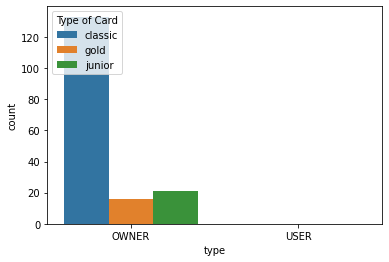

In [76]:
#View those that have cards and those that do not

sns.countplot(x= 'type' ,hue ='Type of Card', data= cdata )

In [77]:
# include the  table for the district table for demography
ddata = pd.merge(cdata,district, left_on = 'district_id', right_on = 'District Code')

In [78]:
#Viewing the new dataset
ddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 826
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   client_id                       827 non-null    int64         
 1   Gender                          827 non-null    object        
 2   Age                             827 non-null    int64         
 3   district_id                     827 non-null    int64         
 4   trans_id                        827 non-null    int64         
 5   Account Balance                 827 non-null    float64       
 6   disp_id                         827 non-null    int64         
 7   account_id                      827 non-null    int64         
 8   type                            827 non-null    object        
 9   card_id                         170 non-null    float64       
 10  Date Card Issued                170 non-null    datetime64[ns]
 11  Type o

In [79]:
#Add orders and loans to the dataset so we have a sense of their history
ldata = pd.merge(ddata, loan, on = 'account_id')

In [80]:
#Viewing the expanded dataset
ldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 826
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   client_id                       827 non-null    int64         
 1   Gender                          827 non-null    object        
 2   Age                             827 non-null    int64         
 3   district_id                     827 non-null    int64         
 4   trans_id                        827 non-null    int64         
 5   Account Balance                 827 non-null    float64       
 6   disp_id                         827 non-null    int64         
 7   account_id                      827 non-null    int64         
 8   type                            827 non-null    object        
 9   card_id                         170 non-null    float64       
 10  Date Card Issued                170 non-null    datetime64[ns]
 11  Type o

In [102]:
# include orders data for better analysis
odata = pd.merge(ldata, orders, on = 'account_id', how='left')

In [82]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6471 entries, 0 to 6470
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          6471 non-null   int64  
 1   account_id        6471 non-null   int64  
 2   Amount Debited    6471 non-null   float64
 3   Recipient Bank    6471 non-null   object 
 4   Reason for debit  6471 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 252.9+ KB


In [83]:
#view the data types in the dataset
odata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1841 entries, 0 to 1840
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   client_id                       1841 non-null   int64         
 1   Gender                          1841 non-null   object        
 2   Age                             1841 non-null   int64         
 3   district_id                     1841 non-null   int64         
 4   trans_id                        1841 non-null   int64         
 5   Account Balance                 1841 non-null   float64       
 6   disp_id                         1841 non-null   int64         
 7   account_id                      1841 non-null   int64         
 8   type                            1841 non-null   object        
 9   card_id                         354 non-null    float64       
 10  Date Card Issued                354 non-null    datetime64[ns]
 11  Type

In [84]:
#view dataset
odata.head()

,client_id,Gender,Age,district_id,trans_id,Account Balance,disp_id,account_id,type,card_id,...,loan_id,Date loan taken,Amount of Loan,Loan Payments,Loan Duration,Loan Status,order_id,Amount Debited,Recipient Bank,Reason for debit
0,2,M,75,1,956,69302.0,2,2,OWNER,NaN,...,4959,05-01-94,80952.0,3373.0,24,Contract Finished No Problems,29402,3372.7,ST,Loan Payment
1,2,M,75,1,956,69302.0,2,2,OWNER,NaN,...,4959,05-01-94,80952.0,3373.0,24,Contract Finished No Problems,29403,7266.0,QR,Household Payment
2,3,F,80,1,956,69302.0,3,2,USER,NaN,...,4959,05-01-94,80952.0,3373.0,24,Contract Finished No Problems,29402,3372.7,ST,Loan Payment
3,3,F,80,1,956,69302.0,3,2,USER,NaN,...,4959,05-01-94,80952.0,3373.0,24,Contract Finished No Problems,29403,7266.0,QR,Household Payment
4,424,M,73,1,379,142312.3,424,347,OWNER,NaN,...,5045,01-05-95,187224.0,7801.0,24,"""Contract Finished, Loan not Paid""",29917,7801.2,CD,Loan Payment


In [85]:
#Checking the data types
odata.dtypes

client_id                                  int64
Gender                                    object
Age                                        int64
district_id                                int64
trans_id                                   int64
Account Balance                          float64
disp_id                                    int64
account_id                                 int64
type                                      object
card_id                                  float64
Date Card Issued                  datetime64[ns]
Type of Card                              object
District Code                              int64
District Name                             object
Region                                    object
Population                                 int64
Ratio of Urban Inhabitants               float64
Average Salary                           float64
Unemployment Rate 95                     float64
Number of Committeed Crimes 95           float64
Unemployment Rate 96

In [86]:
#Viewing the datatypes and null values
odata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1841 entries, 0 to 1840
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   client_id                       1841 non-null   int64         
 1   Gender                          1841 non-null   object        
 2   Age                             1841 non-null   int64         
 3   district_id                     1841 non-null   int64         
 4   trans_id                        1841 non-null   int64         
 5   Account Balance                 1841 non-null   float64       
 6   disp_id                         1841 non-null   int64         
 7   account_id                      1841 non-null   int64         
 8   type                            1841 non-null   object        
 9   card_id                         354 non-null    float64       
 10  Date Card Issued                354 non-null    datetime64[ns]
 11  Type

In [87]:
#Checking the shape of the data
odata.shape

(1841, 32)

In [88]:
#Preserving the original data to add to the Kmeans for further analysis

o_odata = odata

In [90]:
#Getting the card details
odata['Type of Card'].value_counts()

classic    276
junior      51
gold        27
Name: Type of Card, dtype: int64

# Displaying Visualizations using Pandas Profiling

In [ ]:
#Generating the report
#prof_report = pandas_profiling.ProfileReport(exp_data, title= 'Czech Bank')

In [ ]:
#Displaying the report
#prof_report.to_widgets()

# Displaying Visualizations Using AutoViz

In [ ]:
# Display the Charts
#odata = AV.AutoViz(odata)

## VISUALIZATIONS

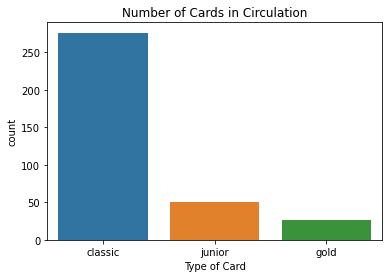

In [95]:
#How many have cards
sns.countplot(odata['Type of Card'])
plt.title('Number of Cards in Circulation')
plt.savefig ('View of Cards in Circulation')

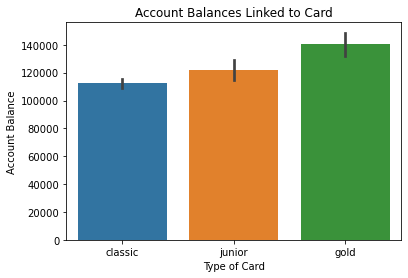

In [97]:
#cards by account balance

sns.barplot(data =odata, x ='Type of Card', y= 'Account Balance')
plt.title('Account Balances Linked to Card')
plt.savefig ('Balance of Accounts with Cards')

In [ ]:
#Checking the number of male and female in the books

sns.barplot(x='Gender', y='client_id', data = odata)

In [ ]:
#Checking the amount held by male and femal customers in the books

sns.barplot(data = odata, x='Gender', y= 'Account Balance')

Type refers to the disposition of the account. It specifies if they are run by Owners or other users.

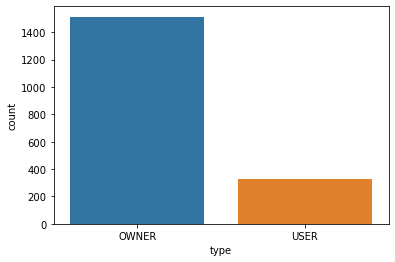

In [98]:
#The categories of customers only owners can issue instructions so we can remove users from the dataset.
sns.countplot(odata.type)

In [103]:
#Selecting only owners from the dataset since they are the only ones that can request for cards

odata = odata[odata.type=='OWNER']

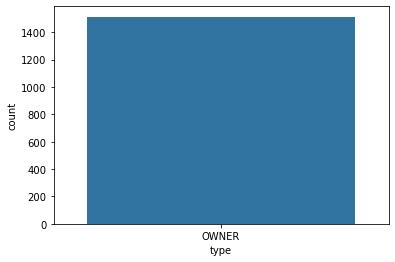

In [104]:
#Confirming there are no 'User' in the dataset
sns.countplot(odata.type)

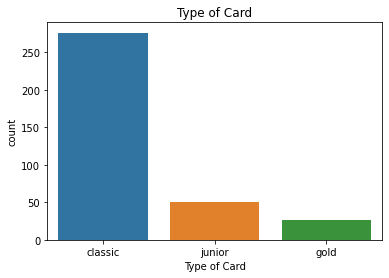

In [105]:
#How many owners have cards
sns.countplot(odata['Type of Card'])
plt.title('Type of Card')
plt.savefig ('View of Owners Cards in Circulation')

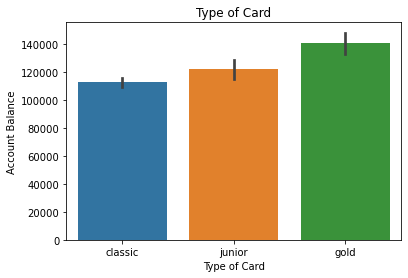

In [106]:
#Owners cards by account balance
sns.barplot(data =odata, x ='Type of Card', y= 'Account Balance')
plt.title('Type of Card')
plt.savefig ('Owners Account Balance with Cards')

In [107]:
odata['Type of Card'].value_counts()

classic    276
junior      51
gold        27
Name: Type of Card, dtype: int64

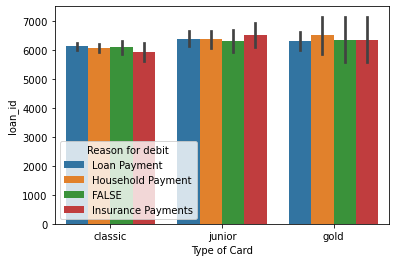

In [108]:
#Checking the customers that have running loans

sns.barplot(data = odata, x = 'Type of Card', y = 'loan_id', hue='Reason for debit')


In [116]:
odata['Reason for debit'].value_counts()

Loan Payment          682
Household Payment     441
FALSE                 276
Insurance Payments    114
Name: Reason for debit, dtype: int64

AttributeError: 'DataFrame' object has no attribute 'value_counts'

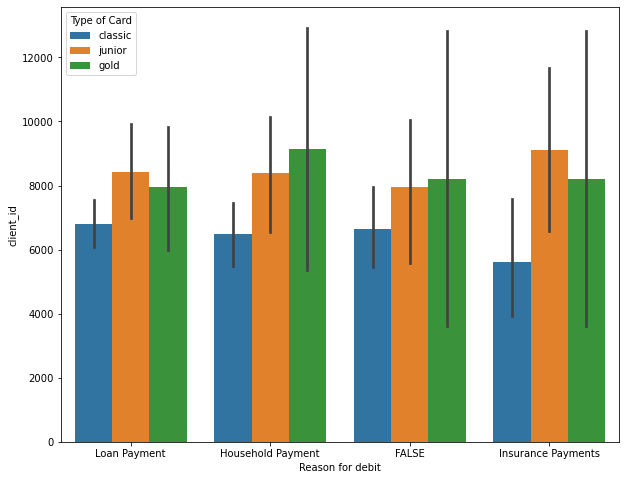

In [132]:
from matplotlib import rcParams
sns.barplot(x='Reason for debit', y='client_id', data=odata, hue ='Type of Card')
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['xtick.labelsize']=10

In [138]:
#The number of customers that pay using the various card
# We will disply this using the cross tab/ contingency tables
pd.crosstab(odata['Type of Card'], odata['Reason for debit'], margins = bool, margins_name= 'Total')


Reason for debit,FALSE,Household Payment,Insurance Payments,Loan Payment,Total
Type of Card,,,,,
classic,47,78,18,133,276
gold,4,5,2,16,27
junior,11,17,2,21,51
Total,62,100,22,170,354


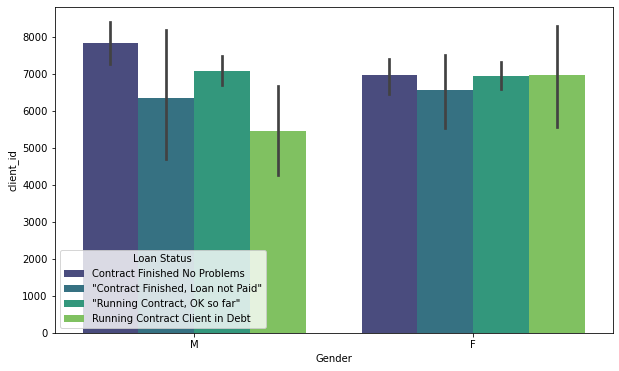

In [148]:
# Get the number of persons with the different loan types
sns.barplot(data = odata, x='Gender', y = 'client_id', hue='Loan Status', palette = 'viridis')
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['xtick.labelsize']=14

Compared with women, men tend to leave their loans unpaid at the end of their contract.

Women on the other hand finished their contracts with their loans remaining unpaid

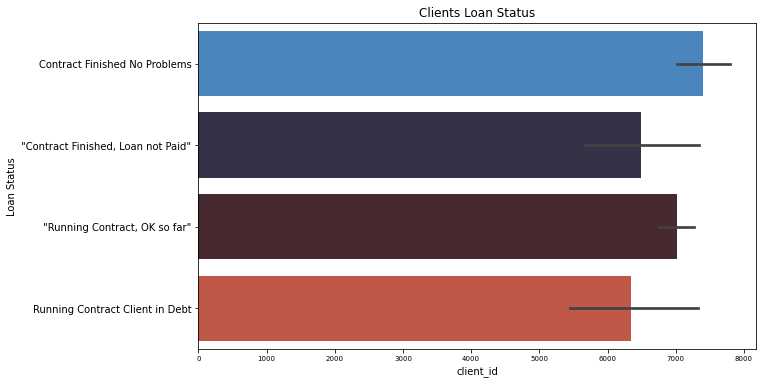

In [158]:
# Get the number of persons with the different loan types
sns.barplot(data = odata, y ='Loan Status', x = 'client_id', palette = 'icefire')
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['xtick.labelsize']=12
plt.title('Clients Loan Status')
plt.savefig('Customers loan status')

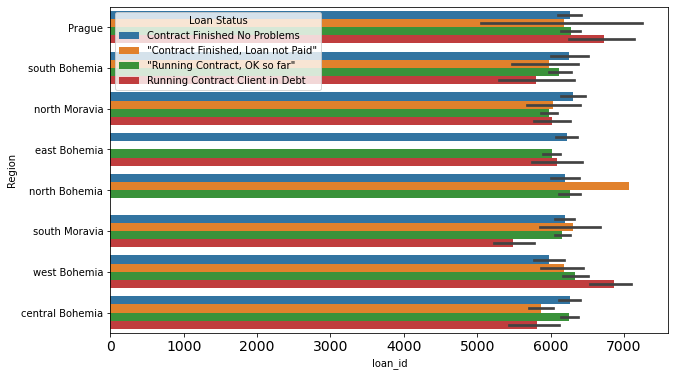

In [157]:
sns.barplot(y='Region', x='loan_id', hue = 'Loan Status', data = odata)
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["xtick.labelsize"] = 7

In [ ]:
sns.barplot(y='Region', x='loan_id', data = odata)
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["xtick.labelsize"] = 7

In [ ]:
import numpy
from numpy import median

In [ ]:
sns.countplot(x='Loan Status', data = odata)
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["xtick.labelsize"] = 7

In [ ]:
sns.barplot(x='Loan Duration', y='loan_id', data = odata)
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams["xtick.labelsize"] = 7

In [ ]:
#plotting the data for the age distribution
sns.countplot(x='Reason for debit', data =odata, hue='Recipient Bank')

In [ ]:
plt.hist(odata.Age, bins=5, rwidth=0.8, color ='brown', label ='Age')
plt.legend()
plt.show()

In [ ]:
#Confirming the missing data in the dataset
odata.isnull().sum()

In [ ]:
#Creating another instance of the data to for the K-Means.
data = odata

In [ ]:
#Fill the null values with the mean.
odata= odata.fillna(odata.mean().iloc[0])

In [ ]:
#Confirming if there're still null values
odata.isnull().sum()

In [ ]:
odata.drop(['Date loan taken', 'Date Card Issued','district_id','trans_id','account_id','disp_id','loan_id', 'order_id','District Code', 'card_id', 'client_id'], axis=1, inplace=True)

In [ ]:
odata.info()

## Finding the correlation between variables

In [ ]:
print(odata.corr())

In [ ]:
#Plot the correlation
sns.heatmap(odata.corr())

# Checking the degree of correlation using Chi Square

In [ ]:
#Importing the required libraries
#from scipy.stats import chi2_contingency

In [ ]:
# Get the required values
#stat, p, dof, expected= chi2_contingency(odata)

In [ ]:
#Choosing alpha = 0.05 (the range is 0.01 to 0.10)
#alpha = 0.05

In [ ]:
# Decide if the null hypothesis that the values aren't associated is correct
#print('significance=%.3f, p=%.3f' % (alpha, p))
#if p <= alpha:
    #print('Variables are associated (reject H0)')
#else:
    #print('Variables are not associated (H0 is valid)')

# Preprocessing

In [ ]:
#We need to convert the values to numerical values.
#Check the data types
odata.info()

In [ ]:
#Import the required libraries for encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
# View the dataset
odata.head()

In [ ]:
# confirm the number of null values in the dataset
odata.isnull().sum()

In [ ]:
#Confirm the columns in the dataset
odata.columns

In [ ]:
#Confirm the dtypes in the dataset
odata.dtypes

In [ ]:
#changing the data types to numeric for ease in unsupervised learning
odata['Account Balance'] = pd.to_numeric(odata['Account Balance'], errors='coerce', downcast='integer')
odata['Ratio of Urban Inhabitants'] = pd.to_numeric(odata['Ratio of Urban Inhabitants'], errors='coerce', downcast='integer')
odata['Average Salary'] = pd.to_numeric(odata['Average Salary'], errors='coerce', downcast='integer')
odata['Unemployment Rate 95'] = pd.to_numeric(odata['Unemployment Rate 95'], errors='coerce', downcast='integer')
odata['Number of Committeed Crimes 95'] = pd.to_numeric(odata['Number of Committeed Crimes 95'], errors='coerce', downcast='integer')
odata['Amount of Loan'] = pd.to_numeric(odata['Amount of Loan'], errors='coerce', downcast='integer')
odata['Loan Payments'] = pd.to_numeric(odata['Loan Payments'], errors='coerce', downcast='integer')
odata['Amount Debited'] = pd.to_numeric(odata['Amount Debited'], errors='coerce', downcast='integer')
odata['Type of Card'] = pd.to_numeric(odata['Type of Card'], errors='coerce', downcast='integer')
odata['District Name'] = pd.to_numeric(odata['District Name'], errors='ignore', downcast='integer')
odata['Region'] = pd.to_numeric(odata['Region'], errors='ignore', downcast='integer')
odata['Loan Status'] = pd.to_numeric(odata['Loan Status'], errors='ignore', downcast='integer')
odata['Recipient Bank'] = pd.to_numeric(odata['Recipient Bank'], errors='ignore', downcast='integer')
odata['Reason for debit'] = pd.to_numeric(odata['Reason for debit'], errors='ignore', downcast='integer')

In [ ]:
#confirming the datatypes have changed
odata.info()

In [ ]:
#transforming the data types to numeric
for column in odata.columns:
    if odata[column].dtype == np.number:
        continue
    odata[column] = LabelEncoder().fit_transform(odata[column])

In [ ]:
#confirming all have been changed
odata.info()

In [ ]:
# View the new data set to confirm they have all been converted to numeric datasets
odata.head()

In [ ]:
#Plotting the correlation on odata dataset 

print(odata.corr())

In [ ]:
#plot the head map
sns.heatmap(odata.corr())

# K-means Clusters

In [ ]:
#Import Library
from sklearn.cluster import KMeans

In [ ]:
#find all columns with NaN values

odata.isnull().sum()

In [ ]:
#Fill the null values with the mean.
odata= odata.fillna(odata.mean().iloc[0])

In [ ]:
#drop empty rows
#odata = odata.dropna()

In [ ]:
#Confirm if there are still null values
odata.isnull().sum()

In [ ]:
#Scaling the data
#import required library
#from sklearn import preprocessing
#odata_scaled = preprocessing.scale(odata)

In [ ]:
#viewing the scaled data
#odata_scaled

In [ ]:
#Using the elbow method to determine the number of clusters
ks = range (1,11)
wcss = []

for k in ks:
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter =300)
    kmeans.fit(odata)
    wcss.append(kmeans.inertia_)



In [ ]:
#plotting the Wcss values
plt.plot(ks, wcss, '-0')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

In [ ]:
#define the elbow
from kneed import KneeLocator
kl = KneeLocator(x = ks, y = wcss, curve="convex", direction="decreasing")

kl.elbow

In [ ]:
#Create Kmeans instance for the 3 clusters
kmeans = KMeans(n_clusters=3, init= 'k-means++', max_iter =300, n_init=10)

In [ ]:
#fit it to the data
kmeans.fit(odata)

In [ ]:
clusters= kmeans.cluster_centers_

In [ ]:
print(clusters)

In [ ]:
# determine the new cluster labels for optimum positioning
cluster_new = kmeans.predict(odata)
#cluster_new['cluster_pred'] = kmeans_new.fit_predict(odata_scaled)
#cluster_new

In [ ]:
#Print the new cluster labels
cluster_new

In [ ]:
#adding the predicted column to the saved dataset
odata['cluster_new'] = cluster_new

In [ ]:
#Adding the derivative from the cluster onto the data dataset

data['cluster_new']= cluster_new

In [ ]:
#checking the columns in the data dataset

odata.info()

In [ ]:
#Plotting some scatter diagram for 

sns.scatterplot(x='Loan Payments', y='Account Balance', hue= 'cluster_new', data= odata) 


Cluster 1 have lower account balances while cluster_new = 0 have higher account balances.

Reviewing other datasets

In [ ]:
#Plotting some scatter diagram for 

sns.scatterplot(x='Average Salary', y='Account Balance', hue= 'cluster_new', data= odata) 


In [ ]:
sns.scatterplot(x='Loan Status', y= 'Account Balance', data = odata, hue = 'cluster_new')

In [ ]:
#Print a scatter diagram of Average Salary against the clusters in odata dataset

sns.scatterplot(x='Average Salary', y='Loan Status', hue='cluster_new', data = odata, palette= 'rainbow_r')

In [ ]:
#Print a scatter diagram of Average Salary against the clusters in odata dataset

sns.scatterplot(x='Age', y='Account Balance', hue='cluster_new', data = odata, alpha =0.5, palette = 'rainbow')

In [ ]:
#Print a scatter diagram of Average Salary against the clusters in odata dataset

sns.scatterplot(x='Loan Status', y='Loan Payments', hue='cluster_new', data = data, alpha =0.5, palette = 'rainbow')

In [ ]:
#Plotting a pairplot of the dataset
X = odata[['Average Salary', 'Age', 'Loan Status', 'Account Balance','Loan Payments', 'Region', 'Loan Duration', 'Recipient Bank', 'Reason for debit', 'cluster_new']]

sns.pairplot(X, hue='cluster_new')

In [ ]:
#Checking with the reserved data dataset
data.info()

In [ ]:
#Checking the dataset

data.head(7)

In [ ]:
#Get the list of customers that don't have cards
newcard = data[data['card_id'].isnull()]

In [ ]:
#view the newcard dataset
newcard.info()

In [ ]:
newcard.client_id.count()

In [ ]:
#Generating a single customer view

newcard = newcard.groupby(['client_id','Gender', 'Age', 'Region','Loan Status', 'Reason for debit', 'cluster_new', 'Amount of Loan']).agg({'Account Balance': 'max', 'Average Salary': 'max', 'Amount Debited':'max'})

In [ ]:
#Reseting Index
newcard.reset_index(inplace=True)

In [ ]:
#View the datatypes
newcard.info()

In [ ]:
#Plotting some variables
o = newcard[['Gender', 'Age', 'Region', 'Amount of Loan', 'Loan Status', 'Reason for debit', 'cluster_new', 'Average Salary']]

sns.pairplot(o, hue='cluster_new')

In [ ]:
#View the clusters in the newcard dataset
newcard.cluster_new.value_counts()

In [ ]:
#Checking the number of loan status

sns.countplot(data=newcard, x = 'Loan Status', hue = 'cluster_new')

Since Credit Card is a loan, we would recommend you issue to customers that have a history of repaying their previous facilities. We will recommend cluster_new = 0 because they were the most compliant in servicing their facilities and lowest defaulters from the chart above

# The Preferred Group are in Cluster_new = 0 and Cluster_new =2

In [ ]:
#Selecting only records where cluster_new==0 and assigning them to the prefered customer dataset.
pref= newcard[newcard['cluster_new']==0]

In [ ]:
#Viewing the customers
pref.head(3)

In [ ]:
pref.info()

In [ ]:
#View the gender of people in this group
sns.countplot(pref['Gender'])

In [ ]:
#View the ages of people in this group

sns.countplot(pref['Age'])

In [ ]:
#Plot a Histogram of the Ages
plt.hist(data = pref, x = 'Age', bins=10, color ='g', rwidth=0.8)
plt.show()

In [ ]:
#Showing a plot of Loan status
sns.countplot(x='Loan Status', data = pref)

In [ ]:
sns.barplot(x= 'Reason for debit', y='Average Salary', hue = 'Gender', data = pref)